In [1]:
import pandas as pd
import numpy as np
import pdb, argparse
import os, pdb, math, itertools
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from kdutils.macro2 import *

In [3]:
method = 'cicso0'
instruments = 'ims'
period = 15
name = 'linear'
task_id = str(INDEX_MAPPING[INSTRUMENTS_CODES[instruments]])

In [4]:
dirs = os.path.join(base_path, method, instruments, 'temp', "model", task_id,
                    str(period))

In [5]:
filename = os.path.join(dirs, "{0}_predict_data.feather".format(name))
filename

'./records/cicso0/ims/temp/model/200037/15/linear_predict_data.feather'

In [6]:
predict_data = pd.read_feather(filename)
predict_data#.head()

,trade_time,code,predict,nxt1_ret_15h
0,2024-12-04 10:43:00,IM,44.083333,-0.003063
1,2024-12-04 10:44:00,IM,43.650000,-0.000925
2,2024-12-04 10:45:00,IM,44.000000,-0.000435
3,2024-12-04 10:46:00,IM,44.616667,-0.001175
4,2024-12-04 10:47:00,IM,45.133333,-0.001559
...,...,...,...,...
15283,2025-03-12 14:56:00,IM,-2.783333,-0.007669
15284,2025-03-12 14:57:00,IM,-0.600000,-0.009878
15285,2025-03-12 14:58:00,IM,1.283333,-0.009747
15286,2025-03-12 14:59:00,IM,2.400000,-0.008376


In [9]:
is_on_mark = predict_data['trade_time'].dt.minute % int(period) == 0
predict_data = predict_data[is_on_mark]
predict_data.replace([np.inf, -np.inf], np.nan, inplace=True)
predict_data.dropna(inplace=True)
predict_data.tail()

,trade_time,code,predict,nxt1_ret_15h
15227,2025-03-12 14:00:00,IM,-46.266667,0.000486
15242,2025-03-12 14:15:00,IM,-46.083333,-0.006092
15257,2025-03-12 14:30:00,IM,-34.983333,0.000127
15272,2025-03-12 14:45:00,IM,-20.600000,-0.002457
15287,2025-03-12 15:00:00,IM,3.850000,-0.007579


In [10]:
from lib.cux001 import FactorEvaluate1

In [11]:
evaluate1 = FactorEvaluate1(factor_data=predict_data,
                                factor_name='predict',
                                ret_name='nxt1_ret_{0}h'.format(period),
                                roll_win=15,
                                fee=0.000,
                                scale_method='roll_zscore',
                                expression=name)

In [16]:
evaluate1.factor_data['f_scaled']

trade_time
2024-12-04 10:45:00         NaN
2024-12-04 11:00:00         NaN
2024-12-04 11:15:00         NaN
2024-12-04 11:30:00         NaN
2024-12-04 13:15:00         NaN
                         ...   
2025-03-12 14:00:00   -0.122722
2025-03-12 14:15:00   -0.087321
2025-03-12 14:30:00    0.237480
2025-03-12 14:45:00    0.620909
2025-03-12 15:00:00    0.888279
Name: f_scaled, Length: 1020, dtype: float64

In [12]:
stats_dt = evaluate1.run()

In [13]:
stats_dt

{'total_ret': -0.060686834493570485,
 'avg_ret': -6.116692519218246e-05,
 'max_dd': -0.06745279088196199,
 'calmar': -0.8996934552310595,
 'sharpe1': -0.040782188008902785,
 'sharpe2': -2.4182147452585085,
 'turnover': 0.14301981920135082,
 'win_rate': 0.47941176470588237,
 'profit_ratio': 0.8694744127566044,
 'ic_mean': 0.07799083527993524,
 'ic_std': 0.2622432935884482,
 'ic_ir': 0.297398778869557,
 'factor_autocorr': 0.9118972247416561,
 'ret_autocorr': -0.025954835907566913}

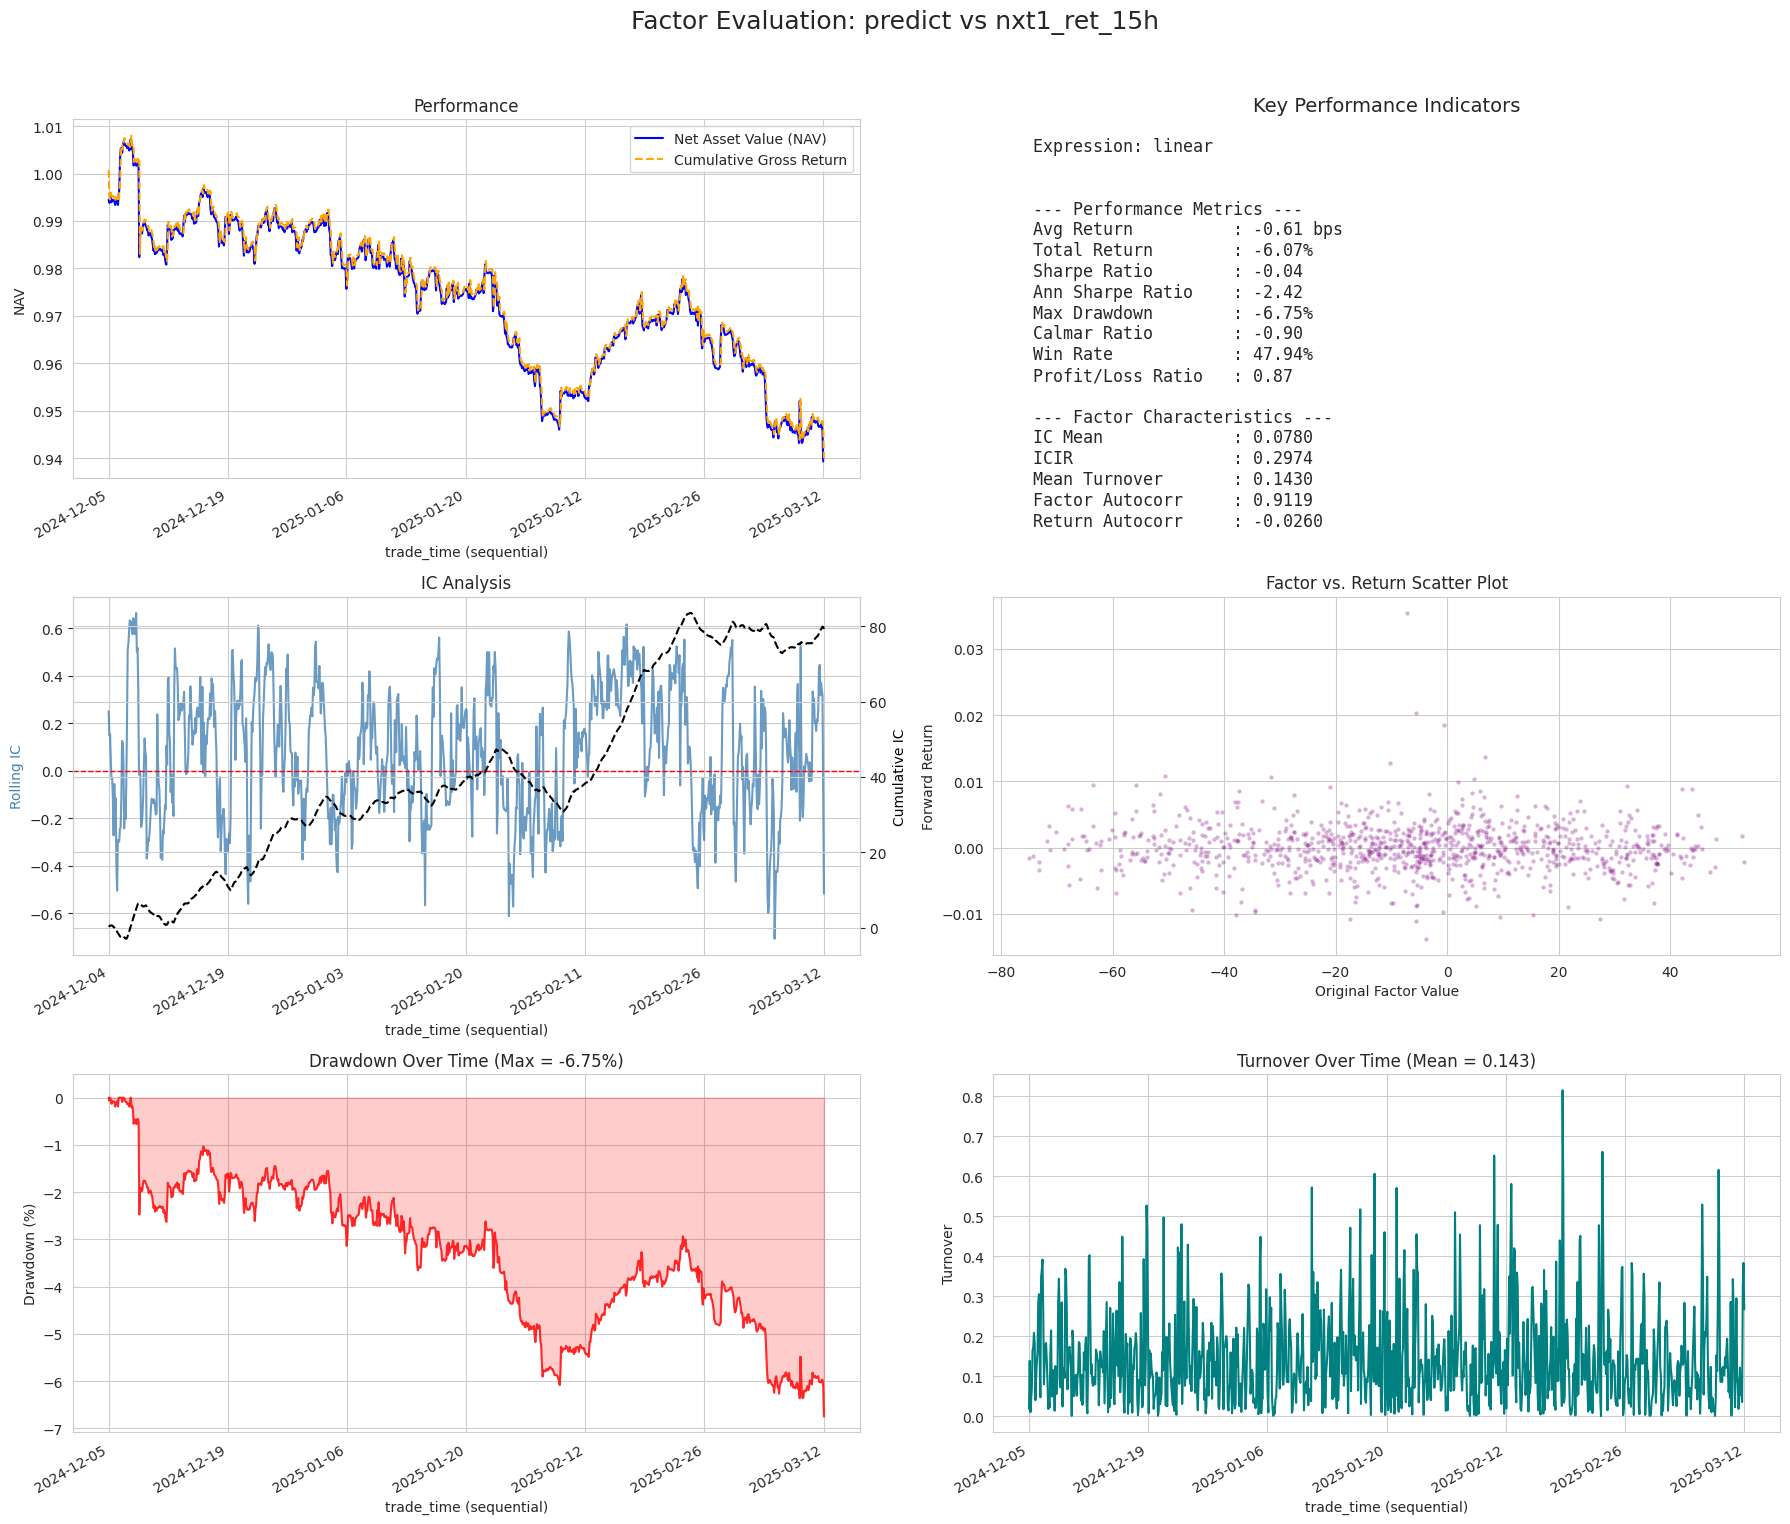

In [14]:
evaluate1.plot_results()